In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sys
import math
import scipy

## $\Phi$定義

In [0]:
#eq.3.3
def Phi(x, mu, sigma):
  return np.exp(- np.square(np.abs(x - mu)) / np.square(sigma) )

## $\boldsymbol{x}, \boldsymbol{\mu},\sigma$

In [0]:
X = np.arange(-4-3, 5+3, 0.1)
Mu = np.arange(-4, 4, 1)
sigma = 1

##計算

In [0]:
Y = np.zeros((len(Mu),len(X)))
for i in range(0,len(Mu)):
  for j in range(0,len(X)):
    Y[i][j] = Phi(X[j], Mu[i], sigma)

## plot

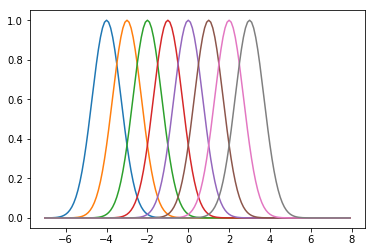

In [0]:
plt.figure()
for n in range(len(Y)):
  plt.plot(X, Y[n])
plt.show()

# $\mu$に対応する$w$

In [0]:
W = np.array([-0.48, -0.64, 0.41, 0.28, 0.57, 0.50, -0.26, 0.60]) 
#W = [np.random.randn() for i in range(len(Mu))]

## 計算

In [0]:
Y_2 = np.zeros((len(Mu),len(X)))
for i in range(0,len(Mu)):
  for j in range(0,len(X)):
    Y_2[i][j] = Phi(X[j], Mu[i], sigma) * W[i]
Y_2_sum = Y_2.sum(axis=0)

## plot

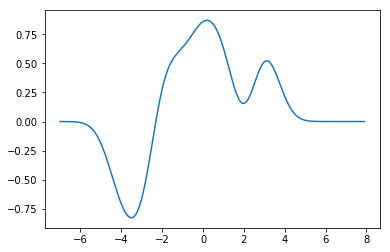

In [0]:
plt.figure()
plt.plot(X, Y_2_sum)
plt.show()

## ここから、$+\alpha$ 
### 2dim

## $\boldsymbol{x}, \boldsymbol{\mu},\sigma$

In [0]:
X = np.arange(-2-5,3+5,1)
Mu = np.arange(-2,3,1)
W = np.array([np.random.randn() for mu1 in Mu for mu2 in Mu]) #mu^(2), 2次元なので...

## 計算

式(2.25) \\
$p(x|0,I)=1/(\sqrt(2\pi))^D exp((-1/2)\boldsymbol{x}^T\boldsymbol{x})$ \\
の対数をとる． \\
$logp(x|0,I) = -(D/2)log(2\pi) -(1/2)\boldsymbol{x}\boldsymbol{x}$

In [0]:
#eq. 2.18 & code2-2
def Log_gauss_multi (x):
  D = len(x)
  log_p = - np.log (2*np.pi) * D / 2 - np.dot(x,x) / 2
  return log_p

In [0]:
Y = []
n = 0
for mu1 in Mu:
  for mu2 in Mu:
    y = []
    for x1 in X:
      for x2 in X:
        yy = np.exp(Log_gauss_multi([x1-mu1, x2-mu2])) * W[n]
        y.append(yy)
    y = np.array(y).reshape(len(X), len(X))
    Y.append(y)
    n += 1

In [0]:
##これでも可

"""
y = [np.exp(Log_gauss_multi([x1-mu1, x2-mu2])) for mu1 in Mu for mu2 in Mu for x1 in X for x2 in X]
Y = np.array(y).reshape(len(Mu)*len(Mu),len(X), len(X))
for n in range(len(Mu)*len(Mu)):
  Y[n] = Y[n]*W[n]
"""

'\ny = [np.exp(Log_gauss_multi([x1-mu1, x2-mu2])) for mu1 in Mu for mu2 in Mu for x1 in X for x2 in X]\nY = np.array(y).reshape(len(Mu)*len(Mu),len(X), len(X))\nfor n in range(len(Mu)*len(Mu)):\n  Y[n] = Y[n]*W[n]\n'

## 25個plot

In [0]:
x1,x2 = np.meshgrid (X,X)

for h in range(len(Y)):
  ax = Axes3D(plt.figure())
  ax.tick_params(labelsize = 8)
  ax.set_xlabel ('x_1')
  ax.set_ylabel ('x_2')
  ax.plot_surface (x1, x2, Y[h], shade=False,linewidth=0.3,edgecolor='black', color='b')
  plt.show()

## 25個のyのsumをplot

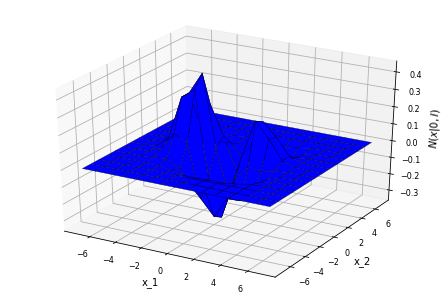

In [0]:
x1,x2 = np.meshgrid (X,X)
#sum
YY = np.sum(Y, axis=0)


ax = Axes3D(plt.figure())
ax.tick_params(labelsize = 8)
ax.set_xlabel ('x_1')
ax.set_ylabel ('x_2')
ax.set_zlabel (r'$N( x | 0, I)$')
ax.plot_surface (x1, x2, YY,shade=False,linewidth=0.3,edgecolor='black', color='b')
plt.show()

# ガウス過程からのサンプル

### カーネル定義

In [0]:
a = 1.02
print (np.abs(a))

1.02


In [0]:
def RBF(theta1, theta2, x,x_d):
  return theta1 * np.exp( - np.square(np.abs(x-x_d)) / theta2)

### パラメータ等

In [0]:
xx = np.arange(1, 5)
theta1 = 1.0
theta2 = 1.0

### カーネル行列計算

In [0]:
K = np.zeros((len(xx), len(xx)))
for i in range(len(xx)):
  for j in range(len(xx)):
    k = RBF(theta1, theta2, xx[i], xx[j])
    K[i][j]=k

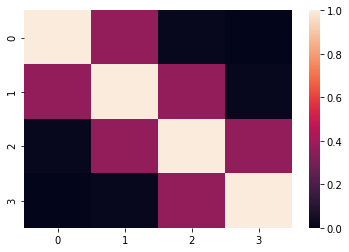

In [0]:
plt.figure()
sns.heatmap(K)
plt.show()

### サンプル

In [0]:
#2.3.2 p.48, 49
#コレスキー
L = np.linalg.cholesky( K )

N = 1
Y = []
for n in range(N):
  x = np.random.randn(len(K[0]))
  y = np.dot(L, x)
  Y.append(y)

### plot

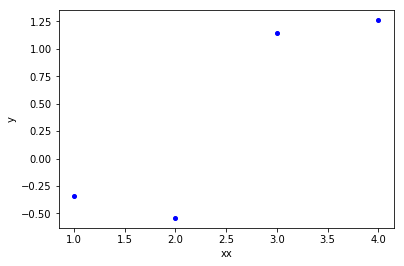

In [0]:
plt.figure()
plt.xlabel('xx')
plt.ylabel('y')


plt.plot (xx, y, 'ob', markersize=4)
plt.show()

## ver2

In [0]:
xx = np.arange(1,5, 0.2)

In [0]:
KK = np.zeros((len(xx), len(xx)))
for i in range(len(xx)):
  for j in range(len(xx)):
    k = RBF(theta1, theta2, xx[i], xx[j])
    KK[i][j]=k

In [0]:
#2.3.2
#コレスキー
LL = np.linalg.cholesky( KK )

N = 1
Y = []
for n in range(N):
  x = np.random.randn(len(KK[0]))
  y = np.dot(LL, x)
  Y.append(y)

### plot

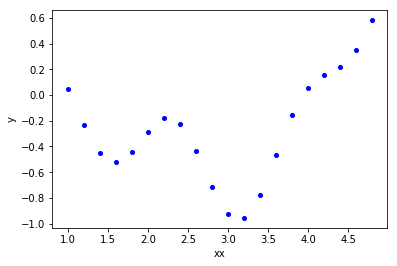

In [0]:
plt.figure()
plt.xlabel('xx')
plt.ylabel('y')


plt.plot (xx, y, 'ob', markersize=4)
plt.show()